# Lecture 10 - Spring 2024

Data Science, Spring 2024

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Big font helper
def adjust_fontsize(size=None):
    SMALL_SIZE = 8
    MEDIUM_SIZE = 10
    BIGGER_SIZE = 12
    if size != None:
        SMALL_SIZE = MEDIUM_SIZE = BIGGER_SIZE = size

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# 1st Task

We will first define some helper functions to calculate the regression line for us. Apply these helper funtions on house price dataset and compare with your previous model (you built using sklearn built-in funtions).

In [3]:
df = pd.read_csv("D:/junotbok/5th week/SLR_house_prices.csv")
df.head(20)

,area,price
0,1360.0,75561.009869
1,4272.0,197449.640308
2,3592.0,180621.795096
3,966.0,45234.416477
4,4926.0,232342.452693
5,3944.0,187987.324203
6,3671.0,182560.239077
7,3419.0,181389.632565
8,630.0,25070.420087
9,2185.0,121483.813999


In [4]:
area_mean = df['area'].mean()

In [5]:
price_mean = df['price'].mean()

In [6]:
df['area']= np.where(df['area'].isnull(),area_mean,df['area'])

In [7]:
df['price']= np.where(df['price'].isnull(),area_mean,df['price'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    1000 non-null   float64
 1   price   1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [9]:
x, y = df[['area']].values, df[['price']].values

In [10]:
# Helper functions
# define standard unit function
def standard_units(x):
    return (x - np.mean(x)) / np.std(x)

# define correlation function
def correlation(x, y):
    x_mean = sum(x) / len(x)
    y_mean = sum(y) / len(y)
    numerator = sum((xi - x_mean) * (yi - y_mean) for xi, yi in zip(x, y))
    denominator = (sum((xi - x_mean) ** 2 for xi in x) * sum((yi - y_mean) ** 2 for yi in y)) ** 0.5
    return numerator / denominator

# define slope function
def slope(x, y):
    x_mean, y_mean = np.mean(x), np.mean(y)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    return numerator / denominator

# define intercept function
def intercept(x, y, theta_1):
    return np.mean(y) - theta_1 * np.mean(x)

# define fit_least_squares function
def fit_least_squares(x, y):
    theta_1 = slope(x, y)
    theta_0 = intercept(x, y, theta_1)
    return theta_0, theta_1

# define predict function
def predict(x, theta_0, theta_1):
    return [theta_0 + theta_1 * xi for xi in x]

# define mse function
def compute_mse(y, yhat):
    return np.mean((np.array(y) - np.array(yhat)) ** 2)

In [11]:
x_standardized = standard_units(x)
x_standardized

array([[-1.1693811 ],
       [ 1.18395919],
       [ 0.63441544],
       [-1.48779322],
       [ 1.71249097],
       [ 0.91888514],
       [ 0.69825949],
       [ 0.49460504],
       [-1.75933248],
       [-0.50265523],
       [-1.24292299],
       [ 0.06790048],
       [ 0.10184289],
       [-0.90753967],
       [ 0.87120414],
       [ 1.46277183],
       [ 0.48248275],
       [-1.481328  ],
       [-0.98997123],
       [ 0.20286196],
       [-0.210104  ],
       [ 0.3556028 ],
       [-1.07644356],
       [-0.40486877],
       [-1.71165148],
       [ 0.34509682],
       [ 0.56410616],
       [-0.32971058],
       [-0.84046301],
       [-0.62953519],
       [ 0.72331222],
       [ 1.00939823],
       [ 1.27932119],
       [-1.34232576],
       [ 0.46955231],
       [ 0.1034592 ],
       [-1.37950077],
       [ 0.04527221],
       [-0.19878986],
       [-1.66962755],
       [-0.21495292],
       [ 0.41783055],
       [ 0.2465022 ],
       [-0.76288036],
       [-0.66994281],
       [ 0

In [12]:
corr = correlation(x, y)
corr

array([0.90077807])

In [13]:
slope_xy = slope(x,y)
slope_xy

np.float64(48.381376364079074)

In [14]:
intercept_xy = intercept(x,y,slope_xy)
intercept_xy

np.float64(1379.0236686508579)

In [15]:
fit = fit_least_squares(x, y)
fit

(np.float64(1379.0236686508579), np.float64(48.381376364079074))

In [16]:
pred = predict(x, intercept_xy, slope_xy)
pred

[array([67177.6955238]),
 array([208064.263496]),
 array([175164.92756842]),
 array([48115.43323635]),
 array([239705.6836381]),
 array([192195.17204858]),
 array([178987.05630119]),
 array([166794.94945744]),
 array([31859.29077802]),
 array([107092.33102416]),
 array([62774.99027467]),
 array([141249.5827372]),
 array([143281.60054449]),
 array([82853.26146576]),
 array([189340.6708431]),
 array([224755.8383416]),
 array([166069.22881198]),
 array([48502.48424726]),
 array([77918.36107662]),
 array([149329.27259]),
 array([124606.38926796]),
 array([158473.35272282]),
 array([72741.55380567]),
 array([112946.47756422]),
 array([34713.7919835]),
 array([157844.39483008]),
 array([170955.74782475]),
 array([117445.94556608]),
 array([86868.91570398]),
 array([99496.454935]),
 array([180486.87896847]),
 array([197613.88620136]),
 array([213773.26590696]),
 array([56824.08098189]),
 array([165295.12679015]),
 array([143378.36329722]),
 array([54598.53766914]),
 array([139894.90419901]),


In [17]:
mean_square_error = compute_mse(y, pred)
mean_square_error

np.float64(833054094.135726)

# 2nd Task
Let's look at four different datasets. Without visualizing the data, let's try fitting the simple linear regression model to these four datasets!

In [18]:
# Load in four different datasets: I, II, III, IV
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

# create dataframes

# apply SLR model on these four Datasets

In [19]:
df1 = pd.DataFrame({'X': x, 'Y': y1})
df2 = pd.DataFrame({'X': x, 'Y': y2})
df3 = pd.DataFrame({'X': x, 'Y': y3})
df4 = pd.DataFrame({'X': x4, 'Y': y4})
print("DataFrame 1:")
print(df1)
print("\nDataFrame 2:")
print(df2)
print("\nDataFrame 3:")
print(df3)
print("\nDataFrame 4:")
print(df4)

DataFrame 1:
     X      Y
0   10   8.04
1    8   6.95
2   13   7.58
3    9   8.81
4   11   8.33
5   14   9.96
6    6   7.24
7    4   4.26
8   12  10.84
9    7   4.82
10   5   5.68

DataFrame 2:
     X     Y
0   10  9.14
1    8  8.14
2   13  8.74
3    9  8.77
4   11  9.26
5   14  8.10
6    6  6.13
7    4  3.10
8   12  9.13
9    7  7.26
10   5  4.74

DataFrame 3:
     X      Y
0   10   7.46
1    8   6.77
2   13  12.74
3    9   7.11
4   11   7.81
5   14   8.84
6    6   6.08
7    4   5.39
8   12   8.15
9    7   6.42
10   5   5.73

DataFrame 4:
     X      Y
0    8   6.58
1    8   5.76
2    8   7.71
3    8   8.84
4    8   8.47
5    8   7.04
6    8   5.25
7   19  12.50
8    8   5.56
9    8   7.91
10   8   6.89


In [20]:
# print values of both parameters (slope, intercept) for all these Datasets

In [21]:
x, y = df1[['X']].values, df1[['Y']].values
slope_xy = slope(x,y)
slope_xy
intercept_xy = intercept(x,y,slope_xy)
intercept_xy
print('Slope for df1 is : ',slope_xy)
print('intercept for df1 is : ',intercept_xy)

Slope for df1 is :  0.5000909090909091
intercept for df1 is :  3.0000909090909103


In [22]:
x, y = df2[['X']].values, df2[['Y']].values
slope_xy = slope(x,y)
slope_xy
intercept_xy = intercept(x,y,slope_xy)
intercept_xy
print('Slope for df2 is : ',slope_xy)
print('intercept for df2 is : ',intercept_xy)

Slope for df2 is :  0.49999999999999994
intercept for df2 is :  3.000909090909091


In [23]:
x, y = df3[['X']].values, df3[['Y']].values
slope_xy = slope(x,y)
slope_xy
intercept_xy = intercept(x,y,slope_xy)
intercept_xy
print('Slope for df3 is : ',slope_xy)
print('intercept for df3 is : ',intercept_xy)

Slope for df3 is :  0.49972727272727274
intercept for df3 is :  3.0024545454545457


In [24]:
x, y = df4[['X']].values, df4[['Y']].values
slope_xy = slope(x,y)
slope_xy
intercept_xy = intercept(x,y,slope_xy)
intercept_xy
print('Slope for df4 is : ',slope_xy)
print('intercept for df4 is : ',intercept_xy)

Slope for df4 is :  0.49990909090909097
intercept for df4 is :  3.0017272727272726


Looks like all four datasets have exactly the same fit.

In fact, all four of them have the same $\bar x$, $\bar y$, $\sigma_x$, $\sigma_y$, correlation $r$, and RMSE! If we only look at these statistics, we will probably be inclined to say that these datasets are similar.

In [25]:
def least_squares_evaluation(x, y, visualize=False):
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    print(f"y = {m:.2f}x + {c:.2f}")
    if visualize:
        plt.plot(x, y, 'o', label='Original data', markersize=10)
        plt.plot(x, m*x + c, 'r', label='Fitted line')
        plt.legend()
        plt.show()

    return plt

>>> Dataset df1:
y = 0.50x + 3.00


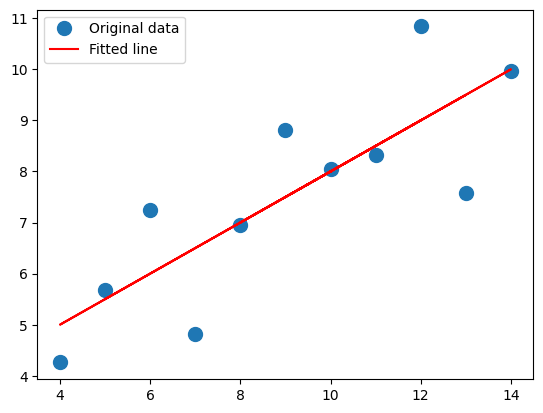



>>> Dataset df2:
y = 0.50x + 3.00


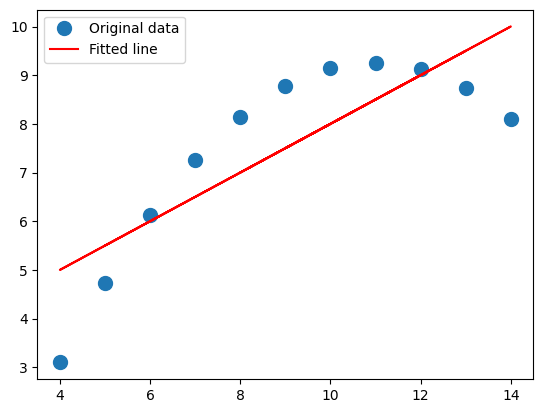



>>> Dataset df3:
y = 0.50x + 3.00


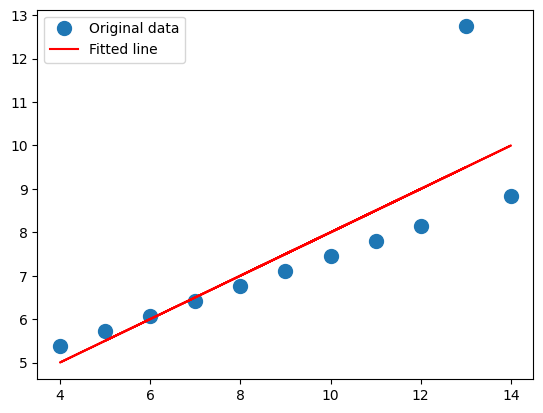



>>> Dataset df4:
y = 0.50x + 3.00


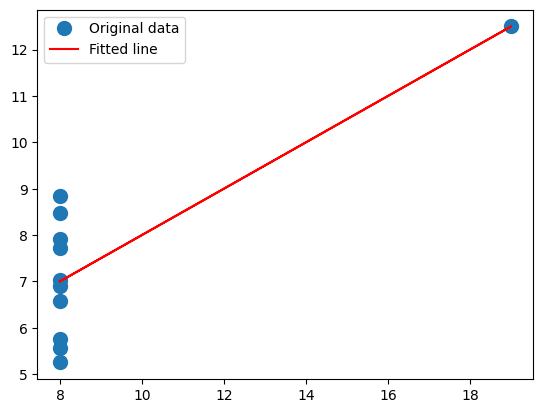

In [26]:
anscombe = {'df1': df1, 'df2': df2, 'df3': df3, 'df4': df4}
NO_VIZ = True
for dataset in ['df1', 'df2', 'df3', 'df4']:
    print(f">>> Dataset {dataset}:")
    ans = anscombe[dataset]
    fig = least_squares_evaluation(ans['X'], ans['Y'], visualize=True)
    print()
    print()

However, it is only when we visualize the datasets that we realize only one of these four sets of data makes sense to model using SLR.

Checking the residuals will also shed light on the differences among these four datasets.

If you remember from Data 8, "the residual plot of a good regression shows no pattern".

In [27]:
# plot residual with respect to x for all four Datasets

>>> Dataset df1:
DF1: y = 0.50x + 3.00
>>> Dataset df2:
DF2: y = 0.50x + 3.00
>>> Dataset df3:
DF3: y = 0.50x + 3.00
>>> Dataset df4:
DF4: y = 0.50x + 3.00


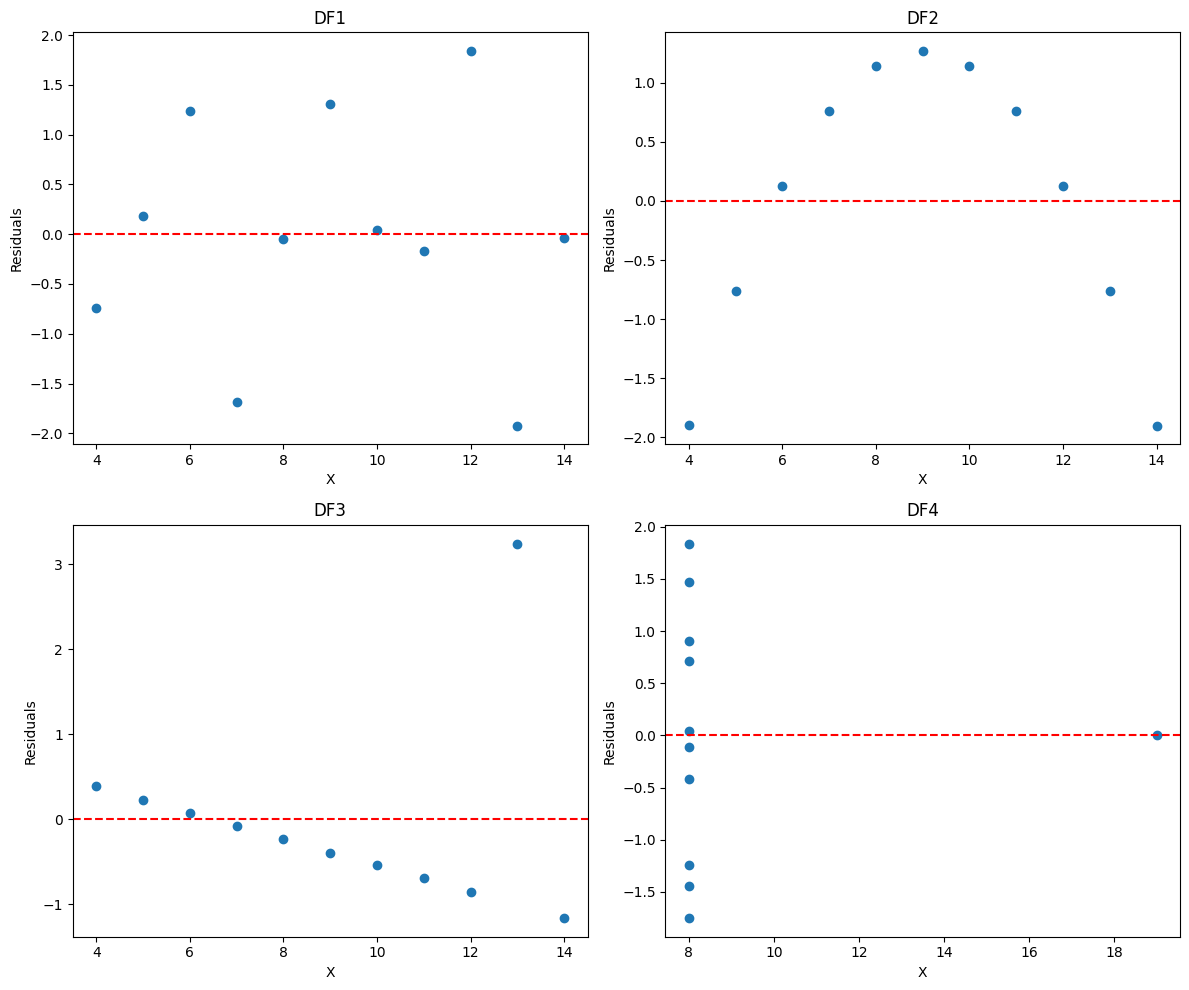

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def least_squares_evaluation(x, y, label, visualize=False):
    # Calculate the coefficients
    m, c = np.polyfit(x, y, 1)

    # Print the coefficients
    print(f"{label}: y = {m:.2f}x + {c:.2f}")

    # Calculate the residuals
    y_fit = m*x + c
    residuals = y - y_fit

    # Return the residuals
    return residuals

# Create a figure and axis
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

for i, dataset in enumerate(['df1', 'df2', 'df3', 'df4']):
    print(f">>> Dataset {dataset}:")
    ans = anscombe[dataset]
    x, y = ans['X'], ans['Y']
    label = dataset.upper()
    residuals = least_squares_evaluation(x, y, label, visualize=False)

    # Plot the residuals
    ax[i//2, i%2].scatter(x, residuals)
    ax[i//2, i%2].axhline(y=0, color='r', linestyle='--')
    ax[i//2, i%2].set_title(label)
    ax[i//2, i%2].set_xlabel("X")
    ax[i//2, i%2].set_ylabel("Residuals")

# Show the plot
plt.tight_layout()
plt.show()

The takeaway here is that you should always visualize your datasets before fitting any models to it!